# Merge subclustering results

In [1]:
#load packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv

In [3]:
#loading data
seu_HQC <- readRDS(file = '../../data/seurat_object/bcdRNAi/seu_HQC2_bcdRNAi.obj')
seu_HQC

An object of class Seurat 
28612 features across 6473 samples within 2 assays 
Active assay: SCT (11108 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


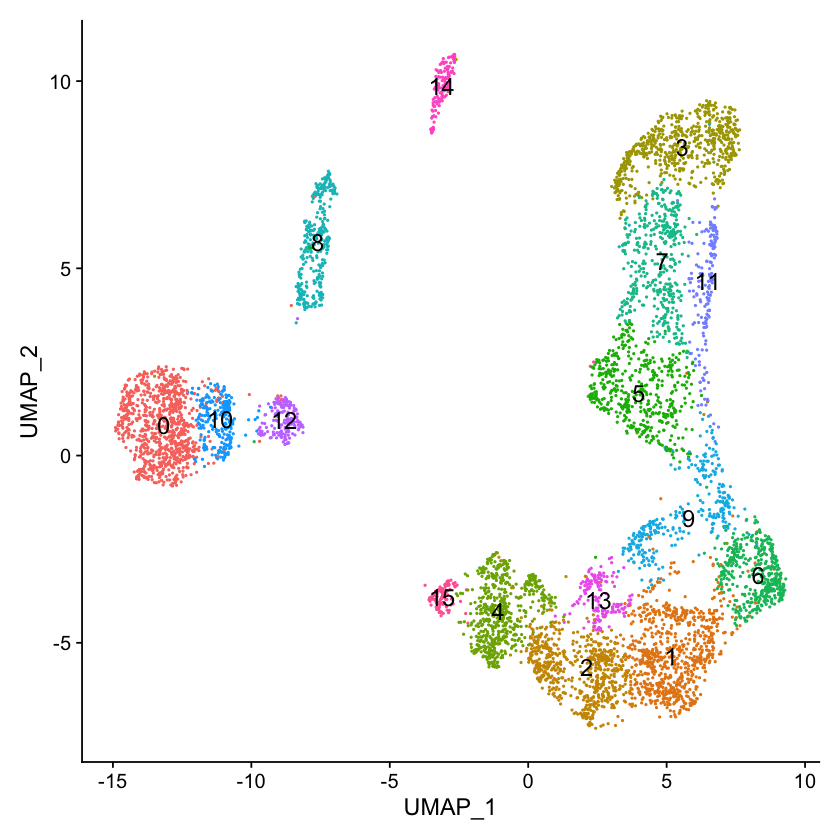

In [4]:
Idents(seu_HQC) <- 'seurat_clusters'
DimPlot(seu_HQC, reduction =  "umap", label = TRUE, label.size = 5) + NoLegend()

## load results

In [5]:
# loading subclustering results
seu.ecto <- readRDS(file = '../../data/seurat_object/bcdRNAi/subclustering/subclustering_lateral_ecto_bcdRNAi.obj')
seu.meso <- readRDS(file = '../../data/seurat_object/bcdRNAi/subclustering/subclustering_meso_bcdRNAi.obj')
seu.post <- readRDS(file = '../../data//seurat_object/bcdRNAi/subclustering/subclustering_post_bcdRNAi.obj')
seu.ecto
seu.meso
seu.post

An object of class Seurat 
28612 features across 2926 samples within 2 assays 
Active assay: SCT (11108 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

An object of class Seurat 
28612 features across 1594 samples within 2 assays 
Active assay: SCT (11108 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

An object of class Seurat 
26833 features across 1705 samples within 2 assays 
Active assay: SCT (9329 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

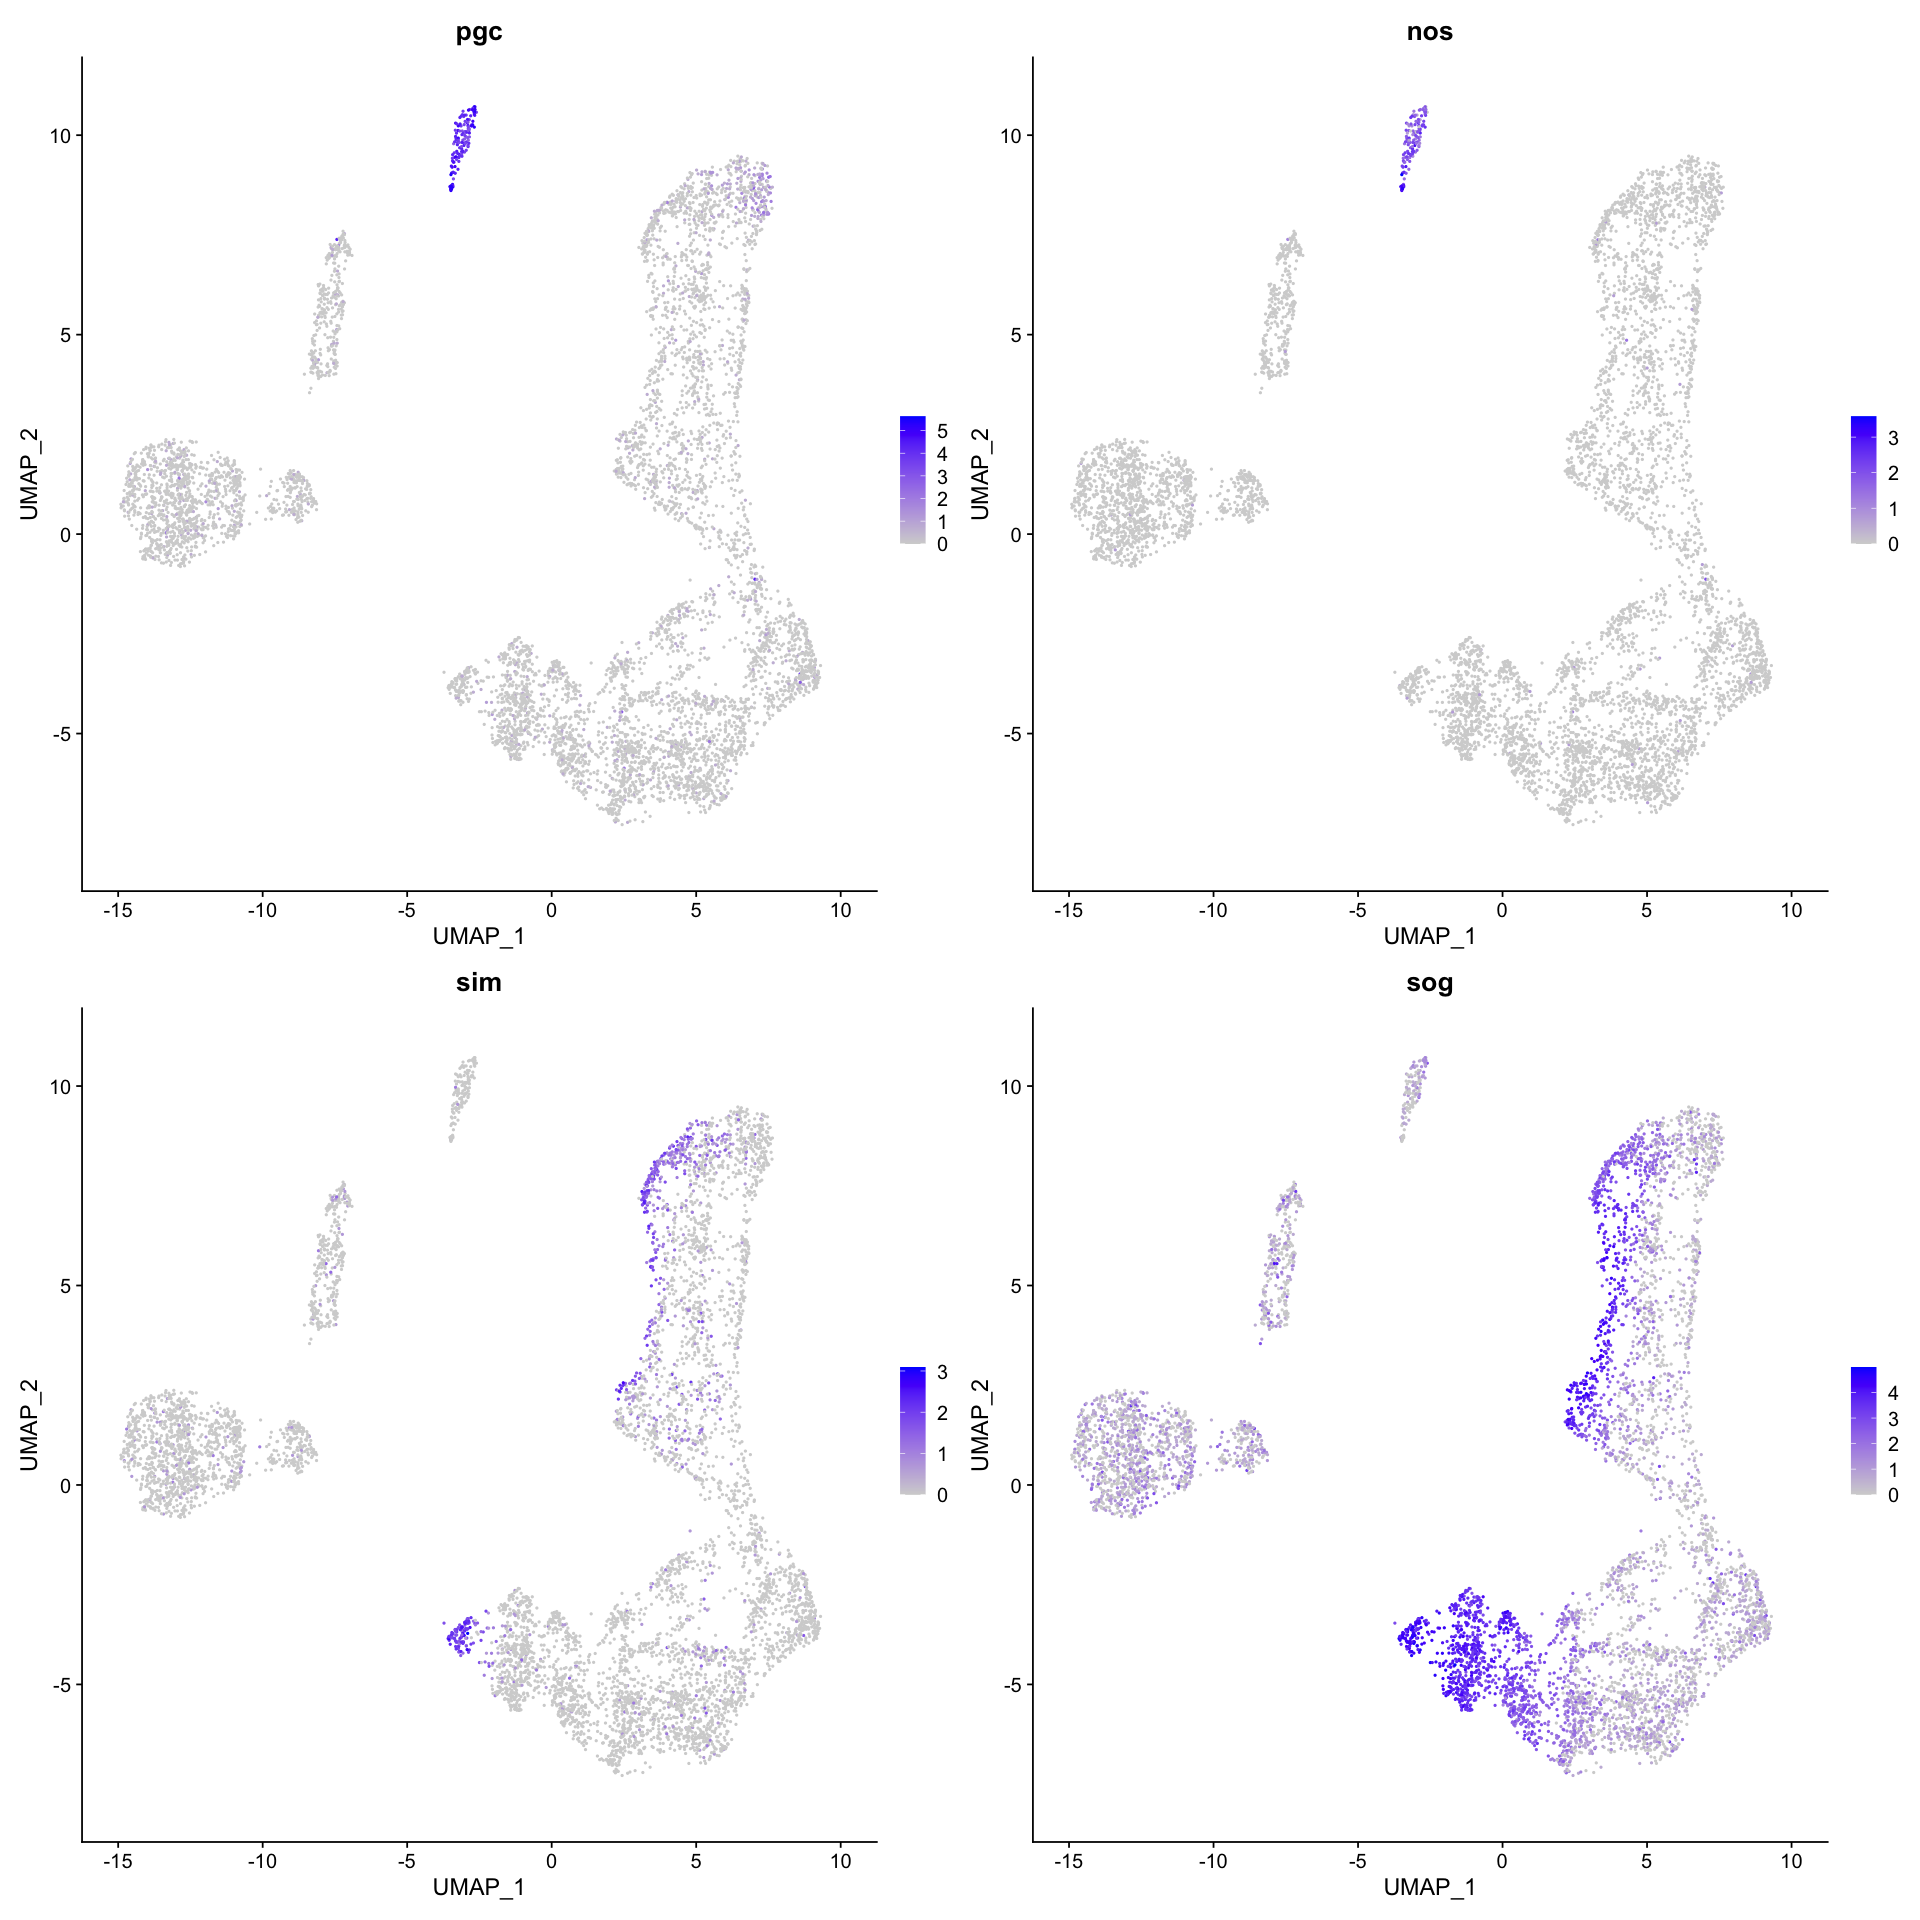

In [6]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, features = c('pgc','nos','sim','sog'))

In [7]:
seu.midline <- subset(seu_HQC,idents=c('15'))
seu.midline$manual_ID <- 'midline_cells'

seu.polecell <- subset(seu_HQC,idents=c('14'))
seu.polecell$manual_ID <- 'pole_cells'

## Merge results

In [8]:
seu.merge <- merge(seu.ecto, y = c(seu.meso,seu.post,seu.midline,seu.polecell))
seu_HQC$manual_ID <- seu.merge$manual_ID 

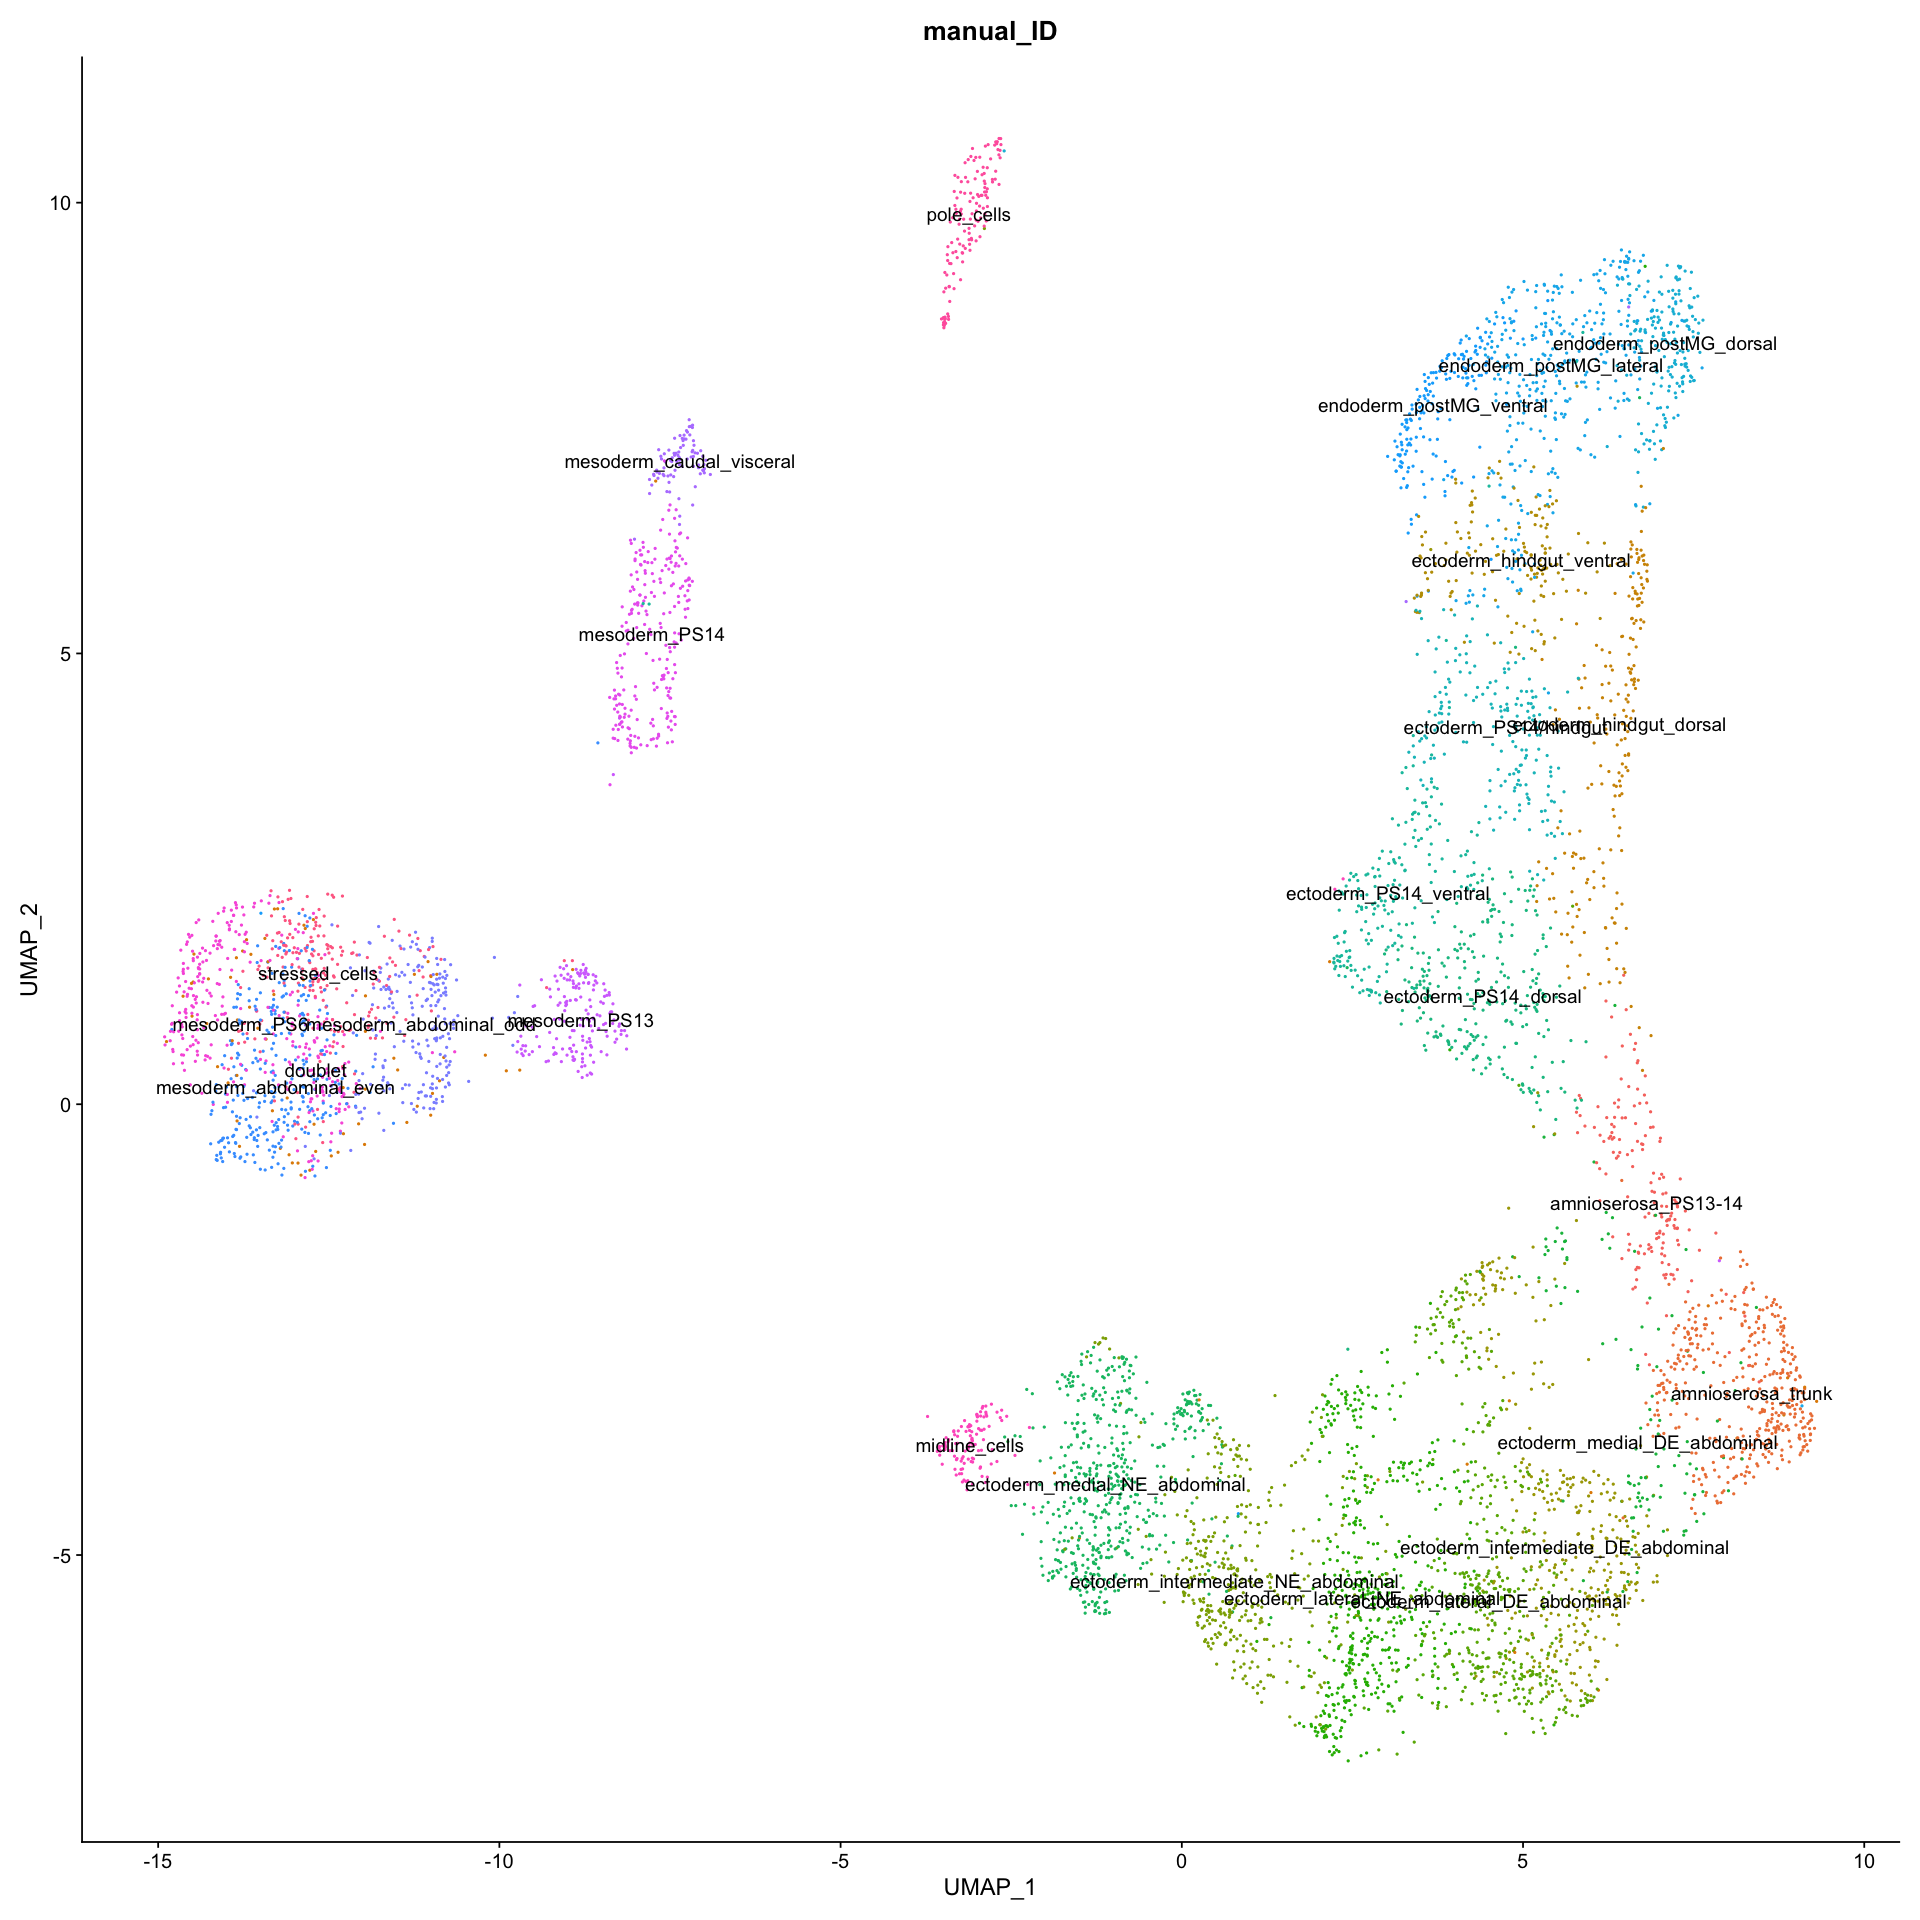

In [9]:
options(repr.plot.width=16, repr.plot.height=16)
DimPlot(seu_HQC, reduction =  "umap", label = TRUE, group.by = 'manual_ID') + NoLegend()

In [10]:
saveRDS(seu_HQC,file = '../../data/seurat_object/bcdRNAi/seu_HQC_subclustered_bcdRNAi.obj')

## Remove doublet and stressed cells

In [11]:
Idents(seu_HQC) <- 'manual_ID'
seu_HQC2 <- subset(seu_HQC, idents = c('doublet','stressed_cells'), invert = T)
seu_HQC2

An object of class Seurat 
28612 features across 6168 samples within 2 assays 
Active assay: SCT (11108 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

## Re-normalization without doublets and stressed cells

In [12]:
DefaultAssay(seu_HQC2) <- 'RNA'
seu_HQC2 <- suppressWarnings(SCTransform(seu_HQC2, vars.to.regress = c('percent.mt','percent.rRNA')))

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11029 by 6168

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 6168 cells



  |======================================================================| 100%


Found 148 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11029 genes



  |======================================================================| 100%


Computing corrected count matrix for 11029 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.068847 mins

Determine variable features

Set 3000 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt, percent.rRNA

Centering data matrix

Set default assay to SCT



PC_ 1 
Positive:  mirr, cv-2, SoxN, CG45263, ImpL2, peb, tup, Svil, E(spl)mgamma-HLH, CG10035 
	   Brd, Alk, Ance, blot, vn, E(spl)m7-HLH, E(spl)m4-BFM, Atx-1, toc, E(spl)malpha-BFM 
	   Dtg, scyl, CG15628, aop, E(spl)m5-HLH, egr, Antp, CrebA, CG13427, CG34224 
Negative:  Ilp4, zfh1, CadN, twi, hll, sna, Mef2, sprt, CG12177, Mes2 
	   VepD, htl, Cyp310a1, Mdr49, tin, NetA, stumps, CG16758, Myc, Act87E 
	   Hsp83, CG1673, CG11357, CycB, CG43658, Nplp2, CG3036, Eno, CG14688, pgc 
PC_ 2 
Positive:  Ilp4, SoxN, CadN, twi, zfh1, stg, hll, sog, sna, trn 
	   ImpL2, Mef2, sprt, sca, Toll-6, ths, CG12177, CG43355-sala, NetA, D 
	   tin, htl, Cyp310a1, wntD, neur, VepD, hth, tkv, CycE, Mdr49 
Negative:  peb, dap, cv-2, Doc1, pgc, tup, mirr, stai, egr, Eno 
	   Doc3, CG45263, fabp-sea, p23, wisp, CycB, nos, Tao, bru1, BigH1 
	   Hsp83, sas, ovo, Cen, zen, Hsp27, 26-29-p, Ance, ps, Alk 
PC_ 3 
Positive:  peb, mirr, CG45263, tup, Ilp4, Svil, zfh1, Ance, twi, hll 
	   CadN, cv-2, egr, Alk, sna, Dtg

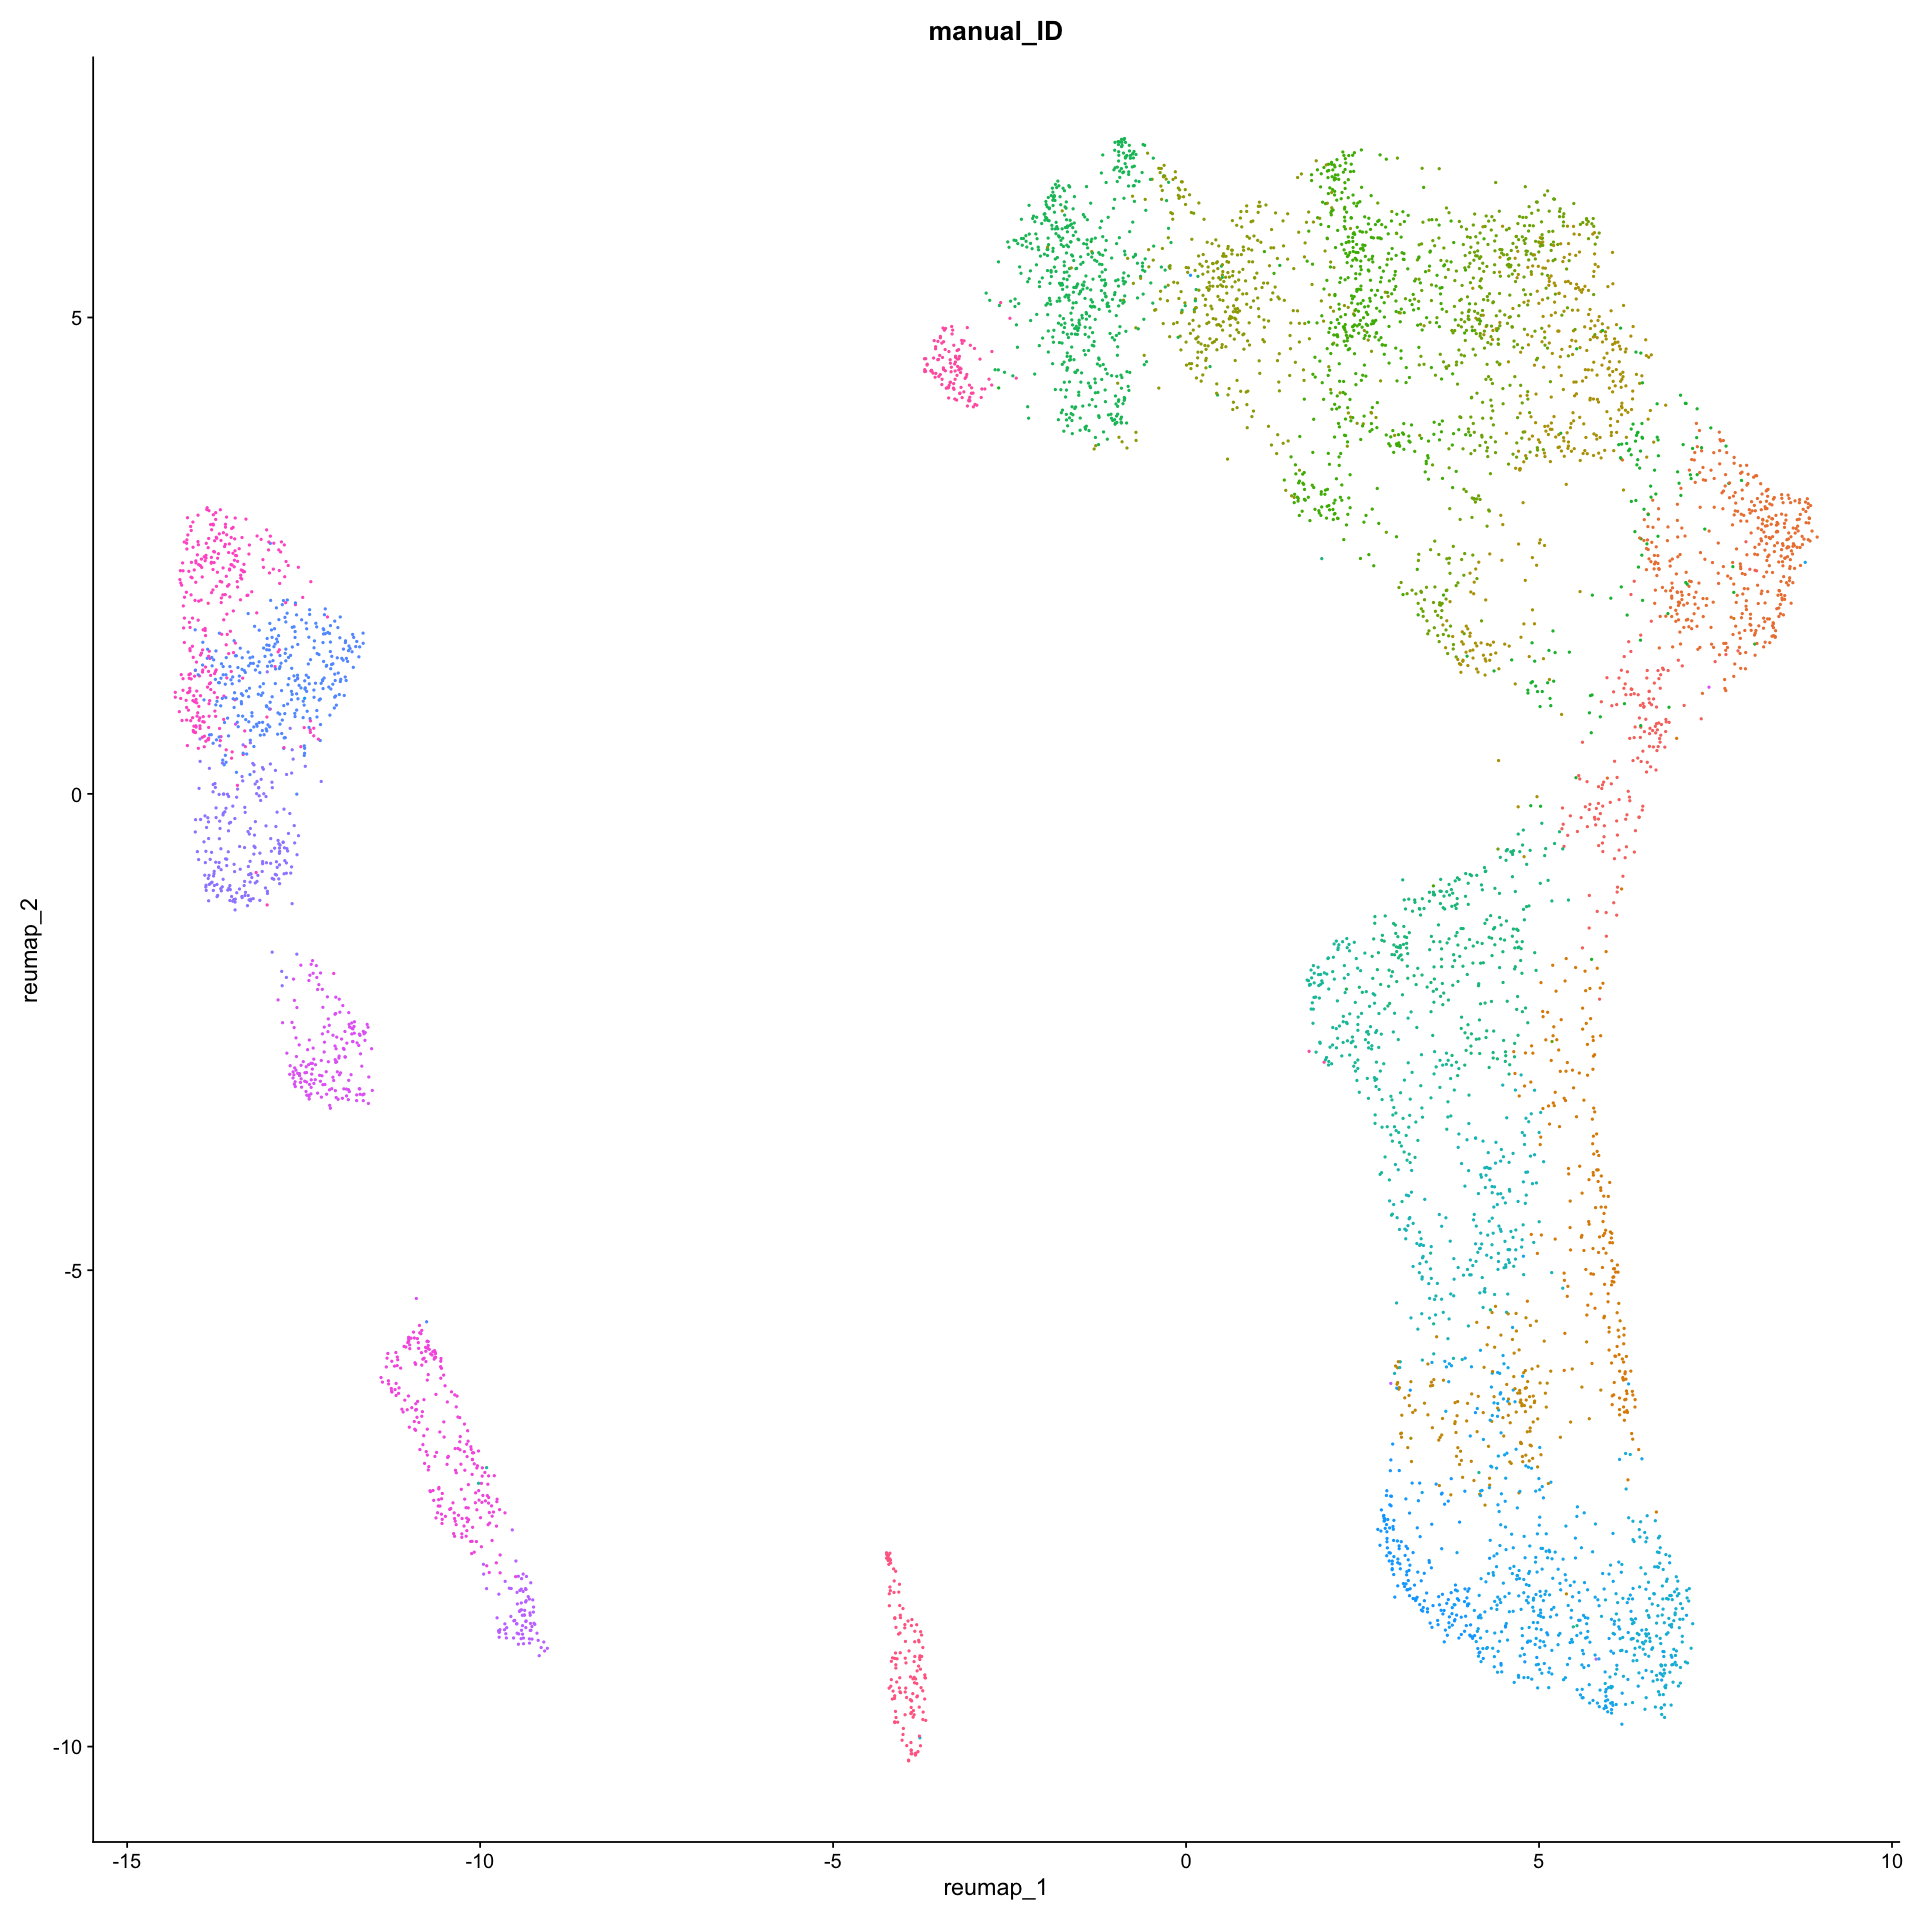

In [13]:
seu_HQC2 <- RunPCA(seu_HQC2)
seu_HQC2 <- RunUMAP(seu_HQC2, dims=1:30, reduction.name = 'reumap')
options(repr.plot.width=16, repr.plot.height=16)
DimPlot(seu_HQC2, reduction = 'reumap', label.size = 8, group.by = 'manual_ID') + NoLegend()

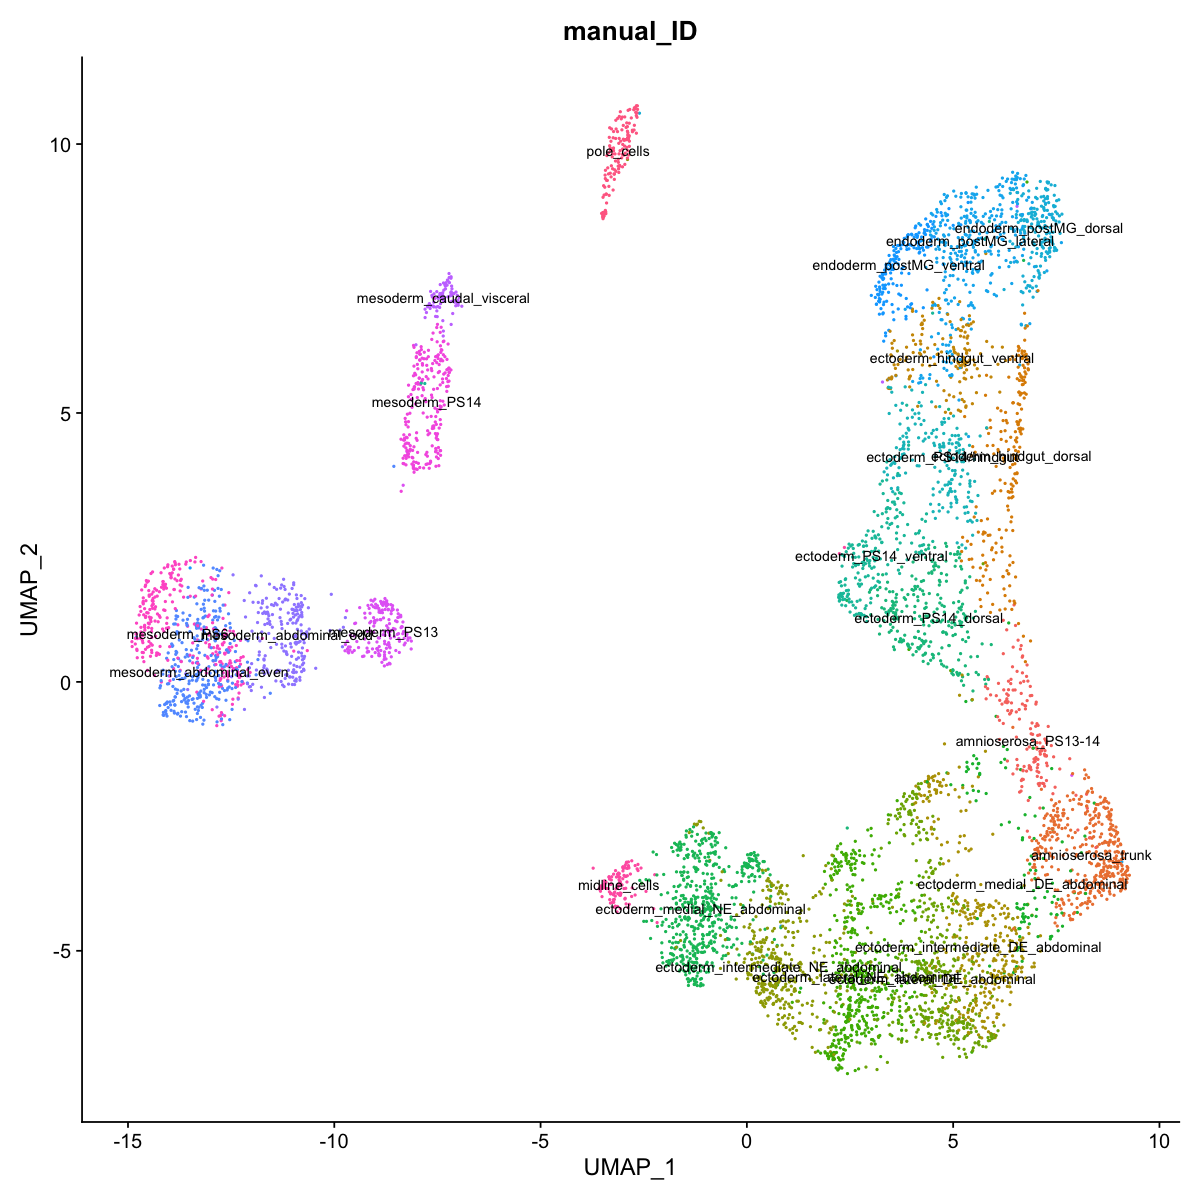

In [14]:
options(repr.plot.width=10, repr.plot.height=10)
DimPlot(seu_HQC2, reduction = 'umap', label.size = 3, group.by = 'manual_ID', label=T) + NoLegend()

In [15]:
levels <- read.table(file="./manual_ID_levels_color_bcdRNAi.txt", comment.char = '')
colors <- levels[,2]
levels <- levels[,1]
head(levels)
length(levels)
head(colors)
Idents(seu_HQC2) <- 'manual_ID'
levels(seu_HQC2) <- levels

[1] "ectoderm_medial_DE_abdominal"       "ectoderm_intermediate_DE_abdominal"
[3] "ectoderm_lateral_DE_abdominal"      "ectoderm_lateral_NE_abdominal"     
[5] "ectoderm_intermediate_NE_abdominal" "ectoderm_medial_NE_abdominal"

[1] 24

[1] "darkolivegreen1" "darkolivegreen2" "olivedrab1"      "olivedrab2"     
[5] "olivedrab3"      "olivedrab4"

Saving 7 x 7 in image



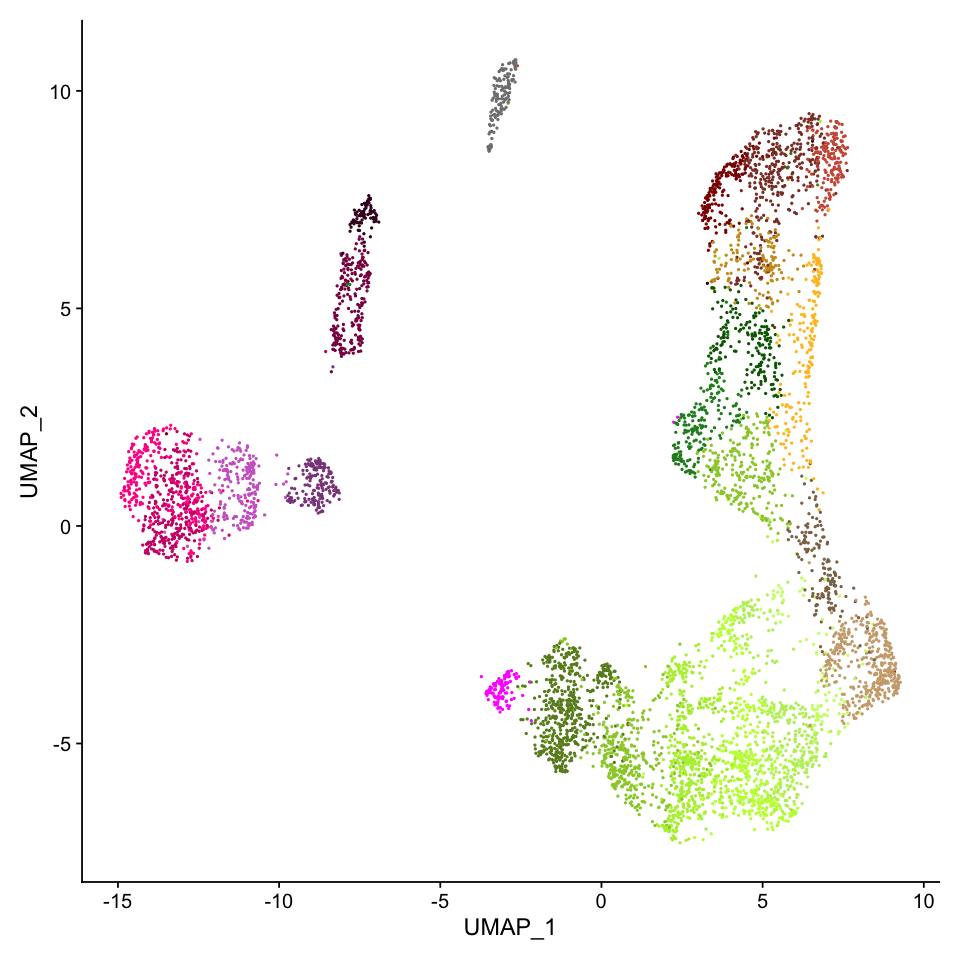

In [16]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu_HQC2, reduction =  "umap", label = FALSE, cols = colors) + NoLegend() 
fig
ggsave(fig, file = "./figures/07_mergeID_bcdRNAi/all_cells_umap_bcdRNAi.eps", dpi = 300)

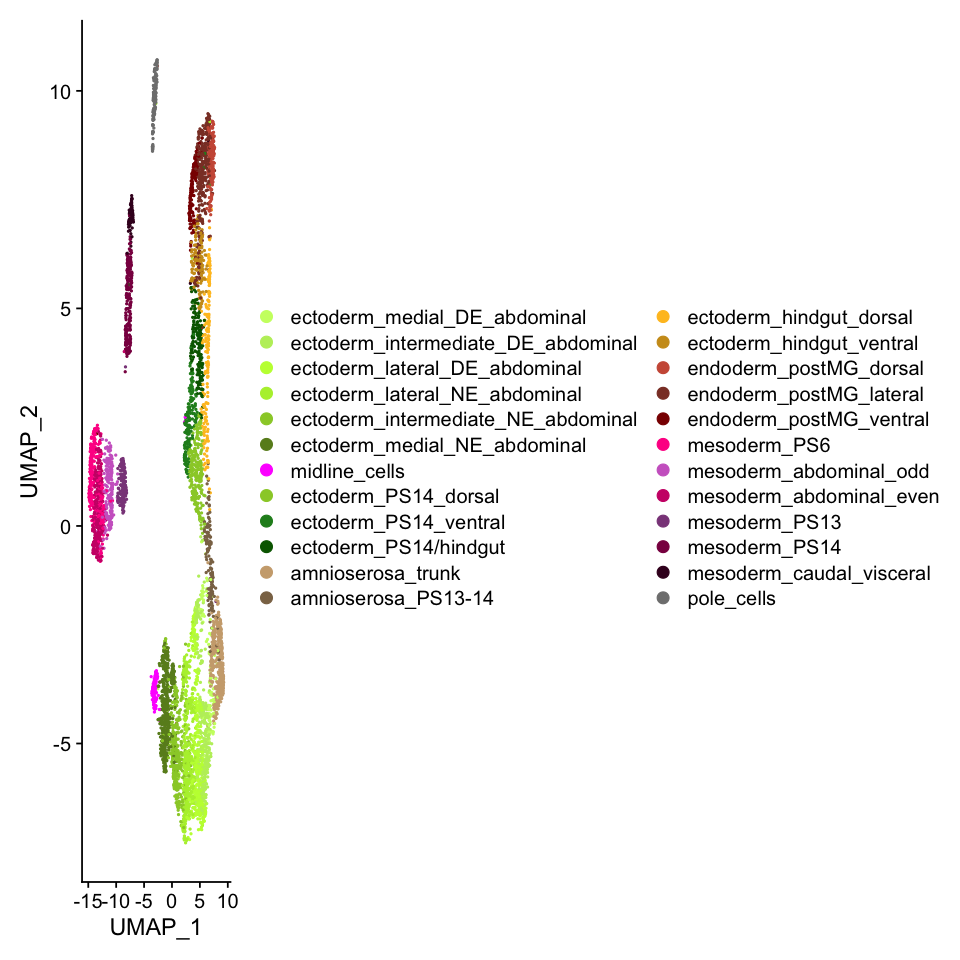

In [17]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu_HQC2, reduction =  "umap", label = FALSE, cols = colors)
fig
ggsave(fig, file = "./figures/07_mergeID_bcdRNAi/all_cells_umap2_bcdRNAi.eps", dpi = 300, width = 15, height = 8)

## Preparation for making loom file

In [18]:
annot_df <- read.csv('./annot_df.csv')
annot_df

cluster_id,cluster_name
<int>,<chr>
1,ectoderm_medial_DE_abdominal
2,ectoderm_intermediate_DE_abdominal
3,ectoderm_lateral_DE_abdominal
4,ectoderm_lateral_NE_abdominal
5,ectoderm_intermediate_NE_abdominal
6,ectoderm_medial_NE_abdominal
7,amnioserosa_trunk
8,amnioserosa_PS13-14
9,midline_cells


In [19]:
manual_ID <- seu_HQC2$manual_ID
unique.manual_ID <- annot_df$cluster_name
manual_ID_num <- copy(manual_ID)
i <- 1
for (name in unique.manual_ID){
    rname <- paste('^',name, sep = '')
    rname <- paste(rname, '$', sep = '')
    manual_ID_num <- gsub(manual_ID_num, pattern = rname, replacement = i)
    i <- i + 1
}
seu_HQC2$manual_ID_num <- manual_ID_num

In [20]:
unique(seu_HQC2$manual_ID_num)

[1] "7"  "4"  "16" "1"  "8"  "20" "3"  "18" "10" "12" "5"  "13" "11" "6"  "2" 
[16] "22" "23" "21" "14" "15" "19" "9"  "17" "24"

In [21]:
# Idents(seu_HQC2) <- 'manual_ID'
# annot_df <- data.frame(list(
#     cluster_id = 1:length(unique.manual_ID), 
#     cluster_name = unique.manual_ID))
# annot_df

In [22]:
# write.csv(annot_df, file = './annot_df.csv')

In [23]:
saveRDS(seu_HQC2,file = '../../data/seurat_object/bcdRNAi/seu_HQC_subclustered2_bcdRNAi.obj')